In [ ]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"tusharsahujsp","key":"e83b96ce40549a2eb56de1eb34f10059"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (2).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database -p /content/diabetes --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 26.9MB/s]


In [ ]:
import pandas as pd
df=pd.read_csv('/content/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
numeric_cols=df.select_dtypes(include=['number']).columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

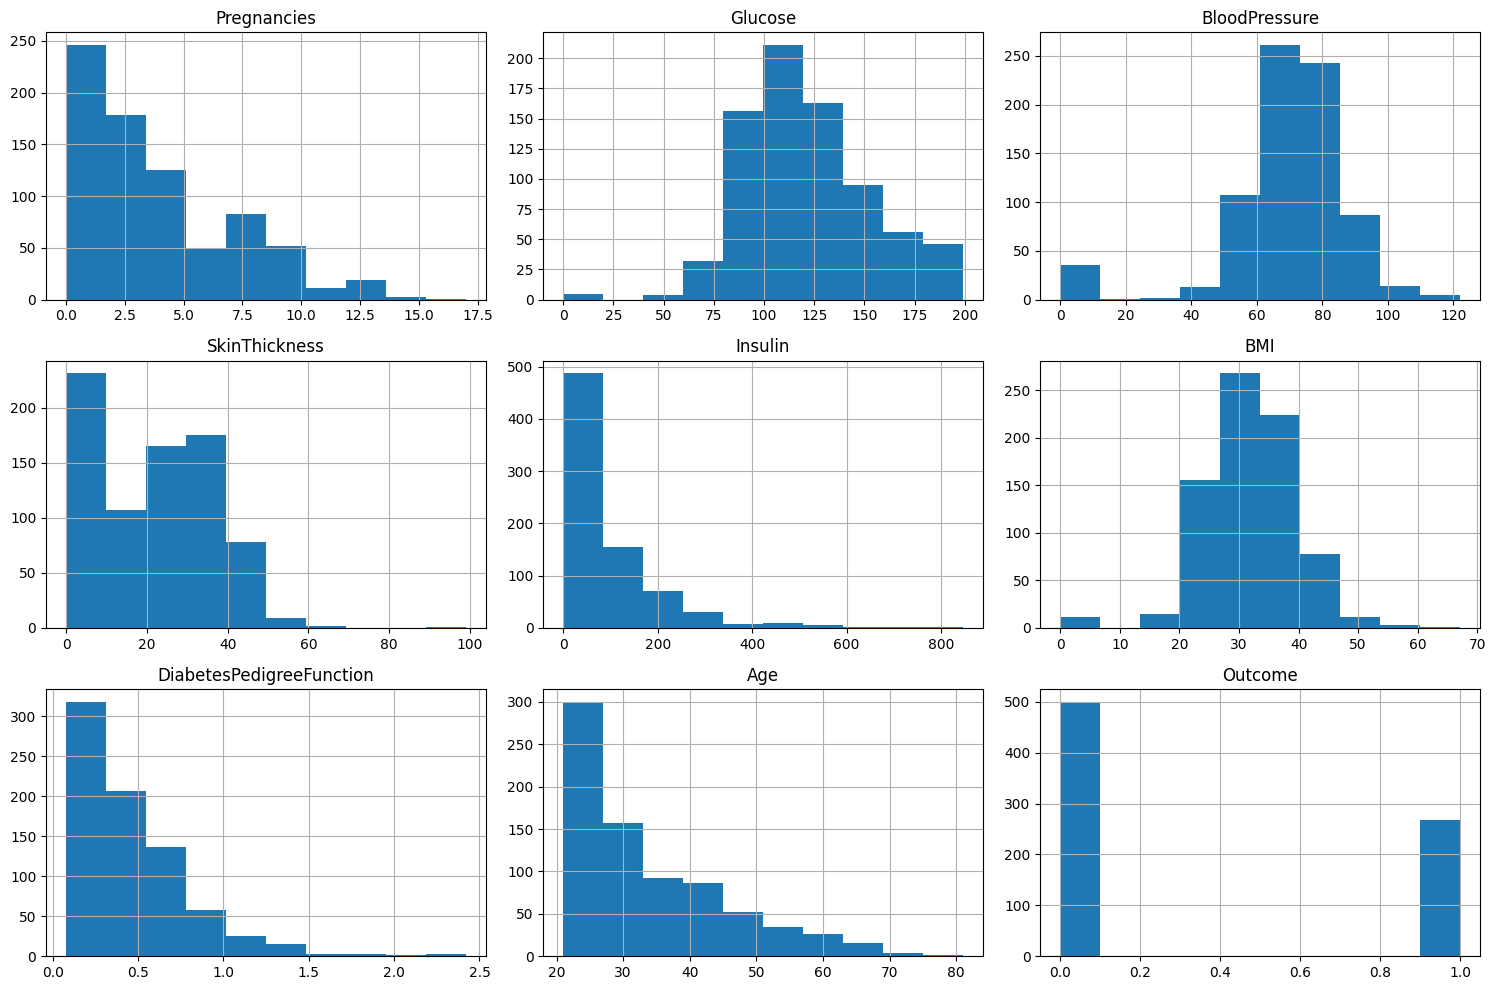

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

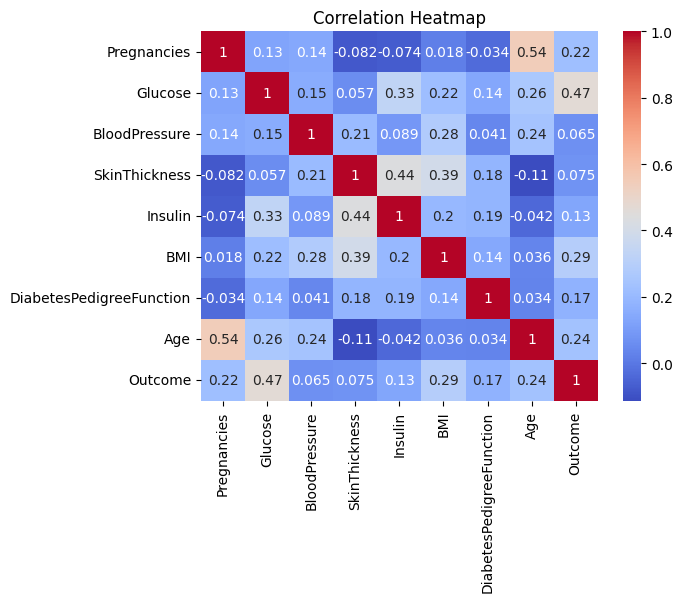

In [ ]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
if 'Outcome' in cat_cols:
  cat_cols.remove('Outcome')

In [ ]:
x=df.drop('Outcome',axis=1)
y=(df['Outcome']>0).astype(int)

In [ ]:
x=pd.get_dummies(x,columns=cat_cols)
print("Final feature columns:",x.columns)

Final feature columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



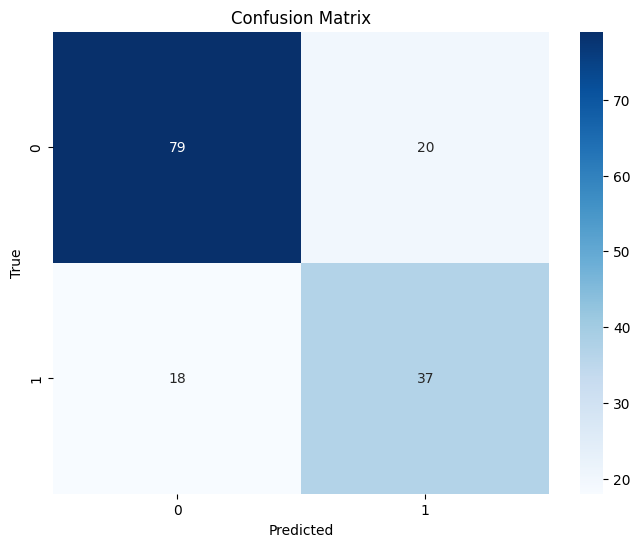

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



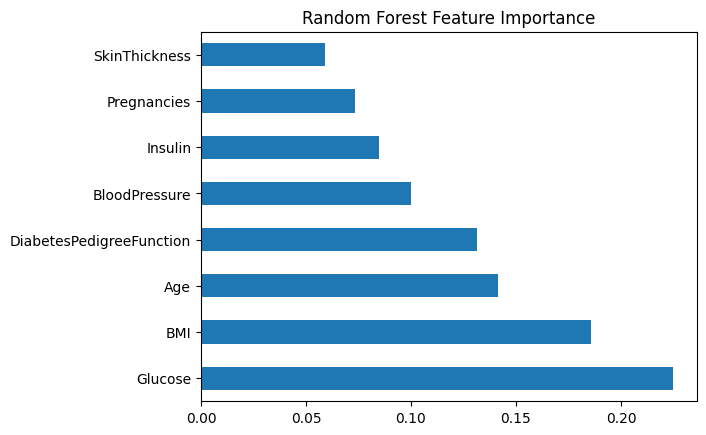

<Figure size 1000x600 with 0 Axes>

In [ ]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.figure(figsize=(10,6))
plt.show()

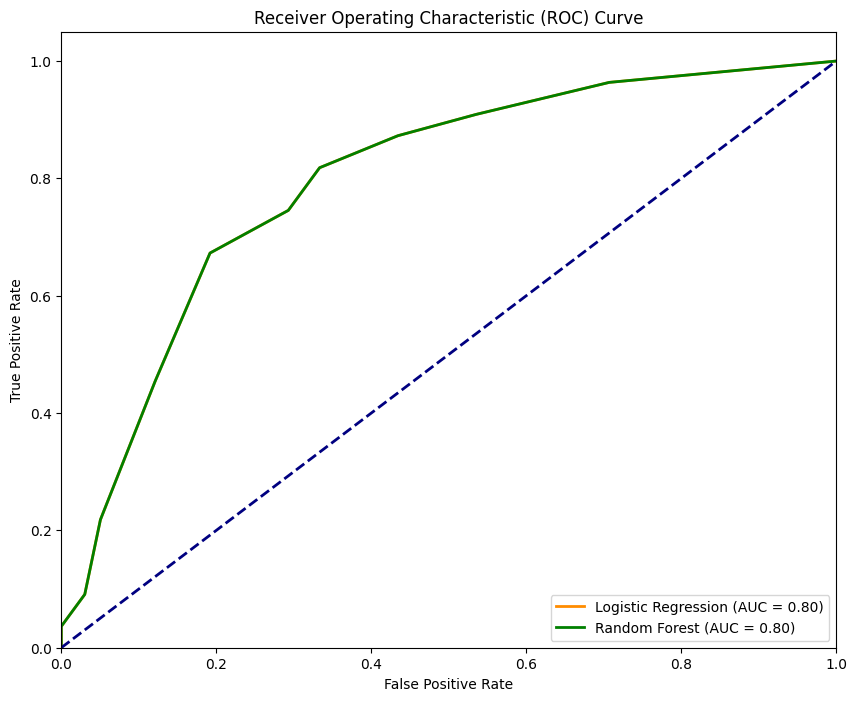

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC AUC for Logistic Regression
y_pred_proba_lr = model.predict_proba(x_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC AUC for Random Forest
# Make sure you have trained the Random Forest model and have the 'model' variable
# If you have trained it in a separate cell, you might need to get the model object
y_pred_proba_rf = model.predict_proba(x_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import zipfile
import os

# Create a directory to save the plots
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)

# Save all open figures
for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(os.path.join(plot_dir, f"plot_{i+1}.png"))

# Create a zip file
zip_file_name = "plots.zip"
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for root, _, files in os.walk(plot_dir):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), plot_dir))

print(f"All plots saved and compressed into {zip_file_name}")

All plots saved and compressed into plots.zip


In [ ]:
!ls

 diabetes  'kaggle (2).json'   plots   plots.zip   sample_data


In [ ]:
from google.colab import files
files.download('plots.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>